In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation
plt.style.use(['dark_background'])

import numpy as np
import pandas as pd

import importlib

from util import preprocess
from util import register
import os

In [2]:
symphony_file = r"C:\Users\zfj\data\120822B\120822B.h5"
raw_file = r"C:\Users\zfj\data\120822B\region2_00001.tif"
# mask_file = r"C:\Users\zfj\data\training\120822B_region4_67_masks.tif"
mask_file = r"C:\Users\zfj\data\training\120822B_region2_34_masks.tif"
dark_file = r"C:\Users\zfj\data\120822B\region2_shuttered_00001.tif"
stack_file = r"C:\Users\zfj\data\120822B\region2_stack_00001.tif"
bin_path =r"C:\Users\zfj\data\120822B\func"

# symphony_file = r"C:\Users\zfj\data\081122B\081122B.h5"
# raw_file = r"C:\Users\zfj\data\081122B\func\region4_00001.tif"
# mask_file = r"C:\Users\zfj\data\training\081122B_region4_67_masks.tif"
# dark_file = r"C:\Users\zfj\data\101222B\dark_level_4.4p_00001.tif"
# stack_file = r"C:\Users\zfj\data\081122B\region4_stack_00002.tif"
# bin_path =r"C:\Users\zfj\data\081122B\func"


# raw = "C:\\Users\\zfj\\data\\081122B\\func\\region4_00001.tif"
# reg = "C:\\Users\\zfj\\data\\081122B\\func\\suite2p\\plane0\\reg_tif_chan2\\file{:03d}_chan1.tif"
# bing = "C:\\Users\\zfj\\data\\081122B\\func\\suite2p\\plane0\\data.bin"
# binr = "C:\\Users\\zfj\\data\\081122B\\func\\suite2p\\plane0\\data_chan2.bin"
# timing = "C:\\Users\\zfj\\data\\081122B\\081122B.h5"
# mask = "C:\\Users\\zfj\\data\\training\\081122B_region4_72_masks.tif"

In [16]:
importlib.reload(preprocess)

blocks = preprocess.extract_parameters(symphony_file)
epochs = preprocess.flatten_epochs(blocks)

props = preprocess.process_raw_file(raw_file, bin_path)
epochs, props = preprocess.align_frames_to_epochs(epochs, props)


Dropped 104 frames in 61 trials (0.080%)


In [32]:
epochs

start_time trial_type  \
0   6.380612e+17   b'field'   
1   6.380612e+17   b'field'   
2   6.380612e+17   b'field'   
3   6.380612e+17   b'field'   
4   6.380612e+17   b'field'   
..           ...        ...   
56  6.380612e+17   b'field'   
57  6.380612e+17    b'bars'   
58  6.380612e+17   b'field'   
59  6.380612e+17   b'field'   
60  6.380612e+17   b'chirp'   

                                                   cx  \
0   [-6.092505905291652, -1.3509474601208424, -26....   
1   [14.058543983109345, -0.03109333077260601, 26....   
2   [-29.319531566414327, 1.4209622247272407, 9.02...   
3   [-20.858018015225674, -16.153910651430216, 9.4...   
4   [25.045424906846044, -14.598499745930528, 23.1...   
..                                                ...   
56  [0.05391699221694779, 29.685575133354106, -4.2...   
57  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
58  [7.088205775321605, -25.799400355894342, -21.4...   
59  [-15.541280271824743, 24.15417974760539, -16.9...   
60  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                                   cy  \
0   [-29.71683132739141, 9.00243488536281, 10.7119...   
1   [-8.720931942085642, 16.386888736342712, 22.90...   
2   [24.54299051656809, 23.673626685075327, -6.088...   
3   [16.88581961461464, -18.547039994506555, -4.28...   
4   [23.69404753377048, 20.510650383893413, -22.14...   
..                                                ...   
56  [-24.371816545477365, 13.510227368256551, 24.7...   
57  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
58  [-20.180490056997442, -3.7125993496660747, -10...   
59  [-8.488827418017838, -24.5725257761615, -29.50...   
60  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                                theta  MstarIntensity1  \
0   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         155949.3   
1   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         155949.3   
2   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         155949.3   
3   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         155949.3   
4   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         155949.3   
..                                                ...              ...   
56  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         155949.3   
57  [5.654866776461628, 1.2566370614359172, 2.5132...         155949.3   
58  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         155949.3   
59  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         155949.3   
60  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...         155949.3   

    MstarMean  NDF  RstarIntensity1  RstarMean  ...  spikeThreshold  \
0         0.0  2.0         225811.4        0.0  ...            -6.0   
1         0.0  2.0         225811.4        0.0  ...            -6.0   
2         0.0  2.0         225811.4        0.0  ...            -6.0   
3         0.0  2.0         225811.4        0.0  ...            -6.0   
4         0.0  2.0         225811.4        0.0  ...            -6.0   
..        ...  ...              ...        ...  ...             ...   
56        0.0  2.0         225811.4        0.0  ...            -6.0   
57        0.0  2.0         225811.4        0.0  ...            -6.0   
58        0.0  2.0         225811.4        0.0  ...            -6.0   
59        0.0  2.0         225811.4        0.0  ...            -6.0   
60        0.0  2.0         225811.4        0.0  ...            -6.0   

    spotIntensity  spotPreFrames  spotSize  spotStimFrames  spotTailFrames  \
0             1.0           15.0      30.0            15.0            45.0   
1             1.0           15.0      30.0            15.0            45.0   
2             1.0           15.0      30.0            15.0            45.0   
3             1.0           15.0      30.0            15.0            45.0   
4             1.0           15.0      30.0            15.0            45.0   
..            ...            ...       ...           

In [35]:
np.where(props['flips']==props['trials'][0])

(array([2097], dtype=int64),)

In [7]:
props['frame_index']

array([-1.000e+00, -1.000e+00, -1.000e+00, ...,  2.098e+03,  2.098e+03,
        2.098e+03])

In [17]:
importlib.reload(preprocess)
spots, chirps, bars = preprocess.time_events(epochs, props)

Detected 1372 spot epochs with spot durations between 15 and 15 frames.
Detected 6 chirp epochs with chirp durations between 1680 and 1680 frames.
Detected 60 bar epochs with bar durations between 180 and 180 frames.


In [18]:
bars

theta    stim_on  stim_on_i   stim_off  stim_off_i     pre_on  \
0   3.769911   49895765         15   50298691         195   49864472   
1   5.654867   50365751        225   50768677         405   50332154   
2   0.000000   50835737        435   51238663         615   50802286   
3   1.256637   51305864        645   51708665         825   51272273   
4   3.141593   51775866        855   52178793        1035   51742258   
5   4.398230   52245853       1065   52648778        1245   52212246   
6   2.513274   52715839       1275   53118765        1455   52682372   
7   5.026548   53185966       1485   53588751        1665   53152375   
8   0.628319   53655952       1695   54058878        1875   53622360   
9   1.884956   54125946       1905   54528880        2085   54092347   
10  5.654867  134739579         15  135142512         195  134708293   
11  1.256637  135209572        225  135612498         405  135176106   
12  1.884956  135679699        435  136082484         615  135646091   
13  0.628319  136149685        645  136552470         825  136116090   
14  3.141593  136619672        855  137022598        1035  136586079   
15  5.026548  137089661       1065  137492600        1245  137056208   
16  2.513274  137559802       1275  137962586        1455  137526193   
17  4.398230  138029787       1485  138432572        1665  137996181   
18  3.769911  138499774       1695  138902700        1875  138466173   
19  0.000000  138969760       1905  139372686        2085  138936310   
20  3.769911  140066588         15  140469373         195  140035170   
21  0.628319  140536574        225  140939375         405  140502983   
22  1.256637  141006577        435  141409503         615  140972968   
23  2.513274  141476563        645  141879489         825  141443068   
24  5.654867  141946690        855  142349475        1035  141913085   
25  1.884956  142416676       1065  142819461        1245  142383086   
26  0.000000  142886663       1275  143289597        1455  142853071   
27  4.398230  143356665       1485  143759591        1665  143323130   
28  3.141593  143826793       1695  144229578        1875  143793184   
29  5.026548  144296779       1905  144699564        2085  144263172   
30  3.141593  184618146         15  185020931         195  184586728   
31  3.769911  185088132        225  185491066         405  185054541   
32  5.026548  185558134        435  185961060         615  185524526   
33  0.628319  186028120        645  186431046         825  185994655   
34  5.654867  186498248        855  186901033        1035  186464639   
35  1.884956  186968234       1065  187371160        1245  186934643   
36  4.398230  187438220       1275  187841149        1455  187404628   
37  1.256637  187908220       1485  188311148        1665  187874756   
38  2.513274  188378350       1695  188781135        1875  188344741   
39  0.000000  188848336       1905  189251262        2085  188814729   
40  5.026548  254380919         15  254783704         195  254349485   
41  1.256637  254850905        225  255253831         405  254817298   
42  0.628319  255320892        435  255723818         615  255287293   
43  1.884956  255791019        645  256193804         825  255757428   
44  3.141593  256261005        855  256663805        1035  256227413   
45  2.513274  256731002       1065  257133933        1245  256697400   
46  4.398230  257200994       1275  257603920        1455  257167385   
47  5.654867  257671121       1485  258073905        1665  257637514   
48  0.000000  258141107       1695  258543892        1875  258107514   
49  3.769911  258611093       1905  259014019        2085  258577502   
50  5.654867  319253190         15  319655975         195  319221757   
51  1.256637  319723176        225  320126102         405  319689585   
52  2.513274  320193163        435  320596093         615  320159711   
53  0.000000  320663293        645  321066090         825  320629699   
54  3.141593  321133292        855  321536077  

In [19]:
importlib.reload(preprocess)
importlib.reload(register)
bars_df = preprocess.segment(bin_path, props, bars, mask_file, dark_file, func_channel = 1)

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


In [77]:
bars

theta    stim_on   stim_off     pre_on   tail_off  stim_on_i  \
0   3.769911   49895765   50298691   49864472   50332154       15.0   
1   5.654867   50365751   50768677   50332154   50802286      225.0   
2   0.000000   50835737   51238663   50802286   51272273      435.0   
3   1.256637   51305864   51708665   51272273   51742258      645.0   
4   3.141593   51775866   52178793   51742258   52212246      855.0   
5   4.398230   52245853   52648778   52212246   52682372     1065.0   
6   2.513274   52715839   53118765   52682372   53152375     1275.0   
7   5.026548   53185966   53588751   53152375   53622360     1485.0   
8   0.628319   53655952   54058878   53622360   54092347     1695.0   
9   1.884956   54125946   54528880   54092347   54560157     1905.0   
10  5.654867  134739579  135142512  134708293  135176106       15.0   
11  1.256637  135209572  135612498  135176106  135646091      225.0   
12  1.884956  135679699  136082484  135646091  136116090      435.0   
13  0.628319  136149685  136552470  136116090  136586079      645.0   
14  3.141593  136619672  137022598  136586079  137056208      855.0   
15  5.026548  137089661  137492600  137056208  137526193     1065.0   
16  2.513274  137559802  137962586  137526193  137996181     1275.0   
17  4.398230  138029787  138432572  137996181  138466173     1485.0   
18  3.769911  138499774  138902700  138466173  138936310     1695.0   
19  0.000000  138969760  139372686  138936310  139403979     1905.0   
20  3.769911  140066588  140469373  140035170  140502983       15.0   
21  0.628319  140536574  140939375  140502983  140972968      225.0   
22  1.256637  141006577  141409503  140972968  141443068      435.0   
23  2.513274  141476563  141879489  141443068  141913085      645.0   
24  5.654867  141946690  142349475  141913085  142383086      855.0   
25  1.884956  142416676  142819461  142383086  142853071     1065.0   
26  0.000000  142886663  143289597  142853071  143323130     1275.0   
27  4.398230  143356665  143759591  143323130  143793184     1485.0   
28  3.141593  143826793  144229578  143793184  144263172     1695.0   
29  5.026548  144296779  144699564  144263172  144730998     1905.0   
30  3.141593  184618146  185020931  184586728  185054541       15.0   
31  3.769911  185088132  185491066  185054541  185524526      225.0   
32  5.026548  185558134  185961060  185524526  185994655      435.0   
33  0.628319  186028120  186431046  185994655  186464639      645.0   
34  5.654867  186498248  186901033  186464639  186934643      855.0   
35  1.884956  186968234  187371160  186934643  187404628     1065.0   
36  4.398230  187438220  187841149  187404628  187874756     1275.0   
37  1.256637  187908220  188311148  187874756  188344741     1485.0   
38  2.513274  188378350  188781135  188344741  188814729     1695.0   
39  0.000000  188848336  189251262  188814729  189282554     1905.0   
40  5.026548  254380919  254783704  254349485  254817298       15.0   
41  1.256637  254850905  255253831  254817298  255287293      225.0   
42  0.628319  255320892  255723818  255287293  255757428      435.0   
43  1.884956  255791019  256193804  255757428  256227413      645.0   
44  3.141593  256261005  256663805  256227413  256697400      855.0   
45  2.513274  256731002  257133933  256697400  257167385     1065.0   
46  4.398230  257200994  257603920  257167385  257637514     1275.0   
47  5.654867  257671121  258073905  257637514  258107514     1485.0   
48  0.000000  258141107  258543892  258107514  258577502     1695.0   
49  3.769911  258611093  259014019  258577502  259045312     1905.0   
50  5.654867  319253190  319655975  319221757  319689585       15.0   
51  1.256637  319723176  320126102  319689585  320159711      225.0   
52  2.513274  320193163  320596093  320159711  320629699      435.0   
53  0.000000  320663293  321066090  320629699  321099684      645.0   
54  3.141593  321133292  321536077  321099684  321569671      855.0   
55  3.769911  321603278  322006

In [427]:
bars_all_df = pd.concat(bars_df).drop(columns=['baseline_y','dFoF'])
# pd.DataFrame({'baseline_fluor':bars_all_df.groupby(['trial','roi']).apply(lambda x: x.loc[x['trial_t']<0, 'fluor'].mean())})
bars_all_df = bars_all_df.join(pd.DataFrame({'baseline_fluor':bars_all_df.groupby(['trial','roi']).apply(lambda x: x.loc[x['trial_t']<0, 'fluor'].mean())}), on=['trial','roi'])
bars_all_df['dFoF'] = (bars_all_df['fluor'] - bars_all_df['baseline_fluor']) / bars_all_df['baseline_fluor'] 

bars_all_df

index        fluor            t   trial_t     x     y  col  line  \
0          1654   -19.787002   371.269165 -0.219738  14.0  11.0   14    11   
1          1655   -73.787002   371.269158 -0.219744  15.0  11.0   15    11   
2          1656   -15.787002   371.269152 -0.219750  16.0  11.0   16    11   
3          1657    -9.787002   371.269146 -0.219757  17.0  11.0   17    11   
4          1782   275.212998   371.269453 -0.219450  14.0  12.0   14    12   
...         ...          ...          ...       ...   ...   ...  ...   ...   
41275  28173220  2159.212998  2411.656608  3.222950  93.0   2.0   93     2   
41276  28173221   695.212998  2411.656614  3.222957  94.0   2.0   94     2   
41277  28173222   371.212998  2411.656621  3.222963  95.0   2.0   95     2   
41278  28173223   539.212998  2411.656627  3.222970  96.0   2.0   96     2   
41279  28173224   504.212998  2411.656634  3.222976  97.0   2.0   97     2   

       frame  trial  roi  baseline_fluor      dFoF  
0      12174      0  151       70.150498 -1.282065  
1      12174      0  151       70.150498 -2.051839  
2      12174      0  151       70.150498 -1.225045  
3      12174      0  151       70.150498 -1.139514  
4      12174      0  151       70.150498  2.923180  
...      ...    ...  ...             ...       ...  
41275  79081     59  276      583.087998  2.703065  
41276  79081     59  276      583.087998  0.192295  
41277  79081     59  276      583.087998 -0.363367  
41278  79081     59  276      583.087998 -0.075246  
41279  79081     59  276      583.087998 -0.135271  

[9045378 rows x 13 columns]

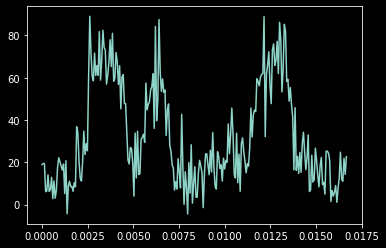

In [428]:
from scipy.interpolate import RBFInterpolator
xn = np.linspace(0,1/60,256)[:,None]
spline = lambda x,y: RBFInterpolator(x.to_numpy()[:,None],y.to_numpy()[:,None],neighbors=1000,smoothing=0.05)

r = spline(bars_all_df[bars_all_df['trial_t']>0]['trial_t'] % (1/60), bars_all_df[bars_all_df['trial_t']>0]['fluor'] - bars_all_df[bars_all_df['trial_t']>0]['baseline_fluor'])(xn)

plt.plot(xn,r)

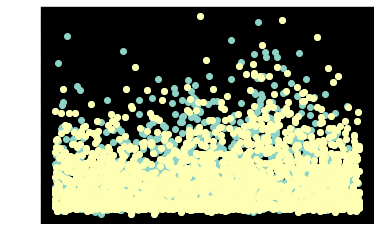

In [389]:
j = 0

t = bars_df[j][bars_df[j]['trial_t']>=0.0][['trial','fluor','trial_t']]
t = t.join(bars.rename_axis('trial')['theta'],on='trial')
t = t[t['theta'] == 0]
plt.scatter(t['trial_t'], t['fluor'])

t = bars_df[j][bars_df[j]['trial_t']>=0.0][['trial','fluor','trial_t']]
t['mt'] = t['trial_t'] % (1/60)
t = t.drop(t.index[(t['mt']>=.0025) & (t['mt']<.005)])
t = t.drop(t.index[(t['mt']>=.0058) & (t['mt']<.0072)])
t = t.drop(t.index[(t['mt']>=.0102) & (t['mt']<.01076)])
t = t.drop(t.index[(t['mt']>=.0116) & (t['mt']<.014)])

t = t.join(bars.rename_axis('trial')['theta'],on='trial')

t = t[t['theta'] == 0]

plt.scatter(t['trial_t'], t['fluor'])

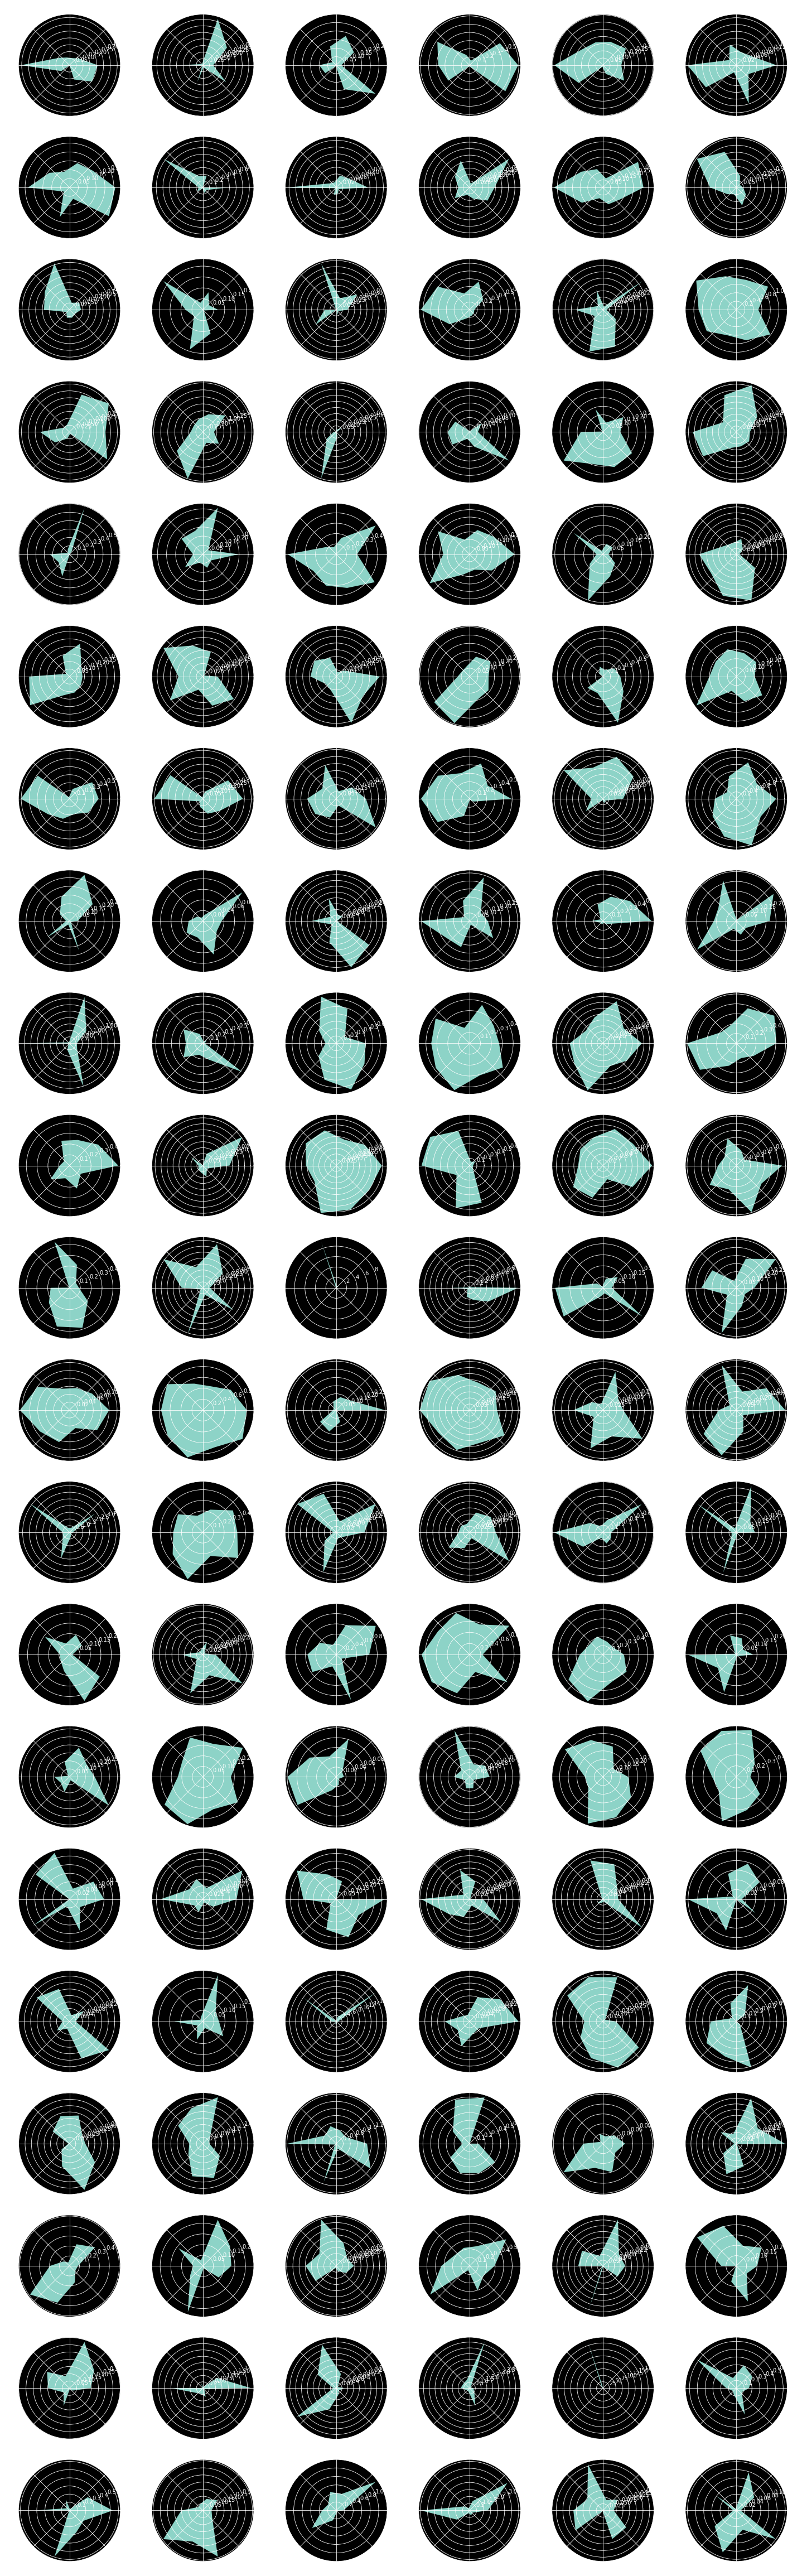

In [376]:
from scipy.interpolate import RBFInterpolator
xn = np.linspace(-.25,3.25,200)[:,None]
bl = xn<0

spline = lambda x,y: RBFInterpolator(x.to_numpy()[:,None],y.to_numpy()[:,None],neighbors=100,smoothing=0.05)
thetas, th_i = np.unique(bars['theta'].to_numpy(),return_inverse=True)
dfof_m = np.zeros((126,len(thetas)))
# y = np.zeros((126,len(thetas), 200))

_,axs = plt.subplots(21,6,figsize=(25,4.5*21), subplot_kw={'projection': 'polar'})
axs = axs.flatten()
for j in range(126):

    t = bars_df[j][bars_df[j]['trial_t']>=0.0][['trial','fluor','trial_t']]
    t['mt'] = t['trial_t'] % (1/60)
    t = t.drop(t.index[(t['mt']>=.0025) & (t['mt']<.005)])
    t = t.drop(t.index[(t['mt']>=.0058) & (t['mt']<.0072)])
    t = t.drop(t.index[(t['mt']>=.0102) & (t['mt']<.01076)])
    t = t.drop(t.index[(t['mt']>=.0116) & (t['mt']<.014)])

    f = t.join(bars.rename_axis('trial')['theta'],on='trial').groupby('theta')['fluor'].mean()
    bl = bars_df[j][bars_df[j]['trial_t']<0.0][['trial','fluor']].join(bars.rename_axis('trial')['theta'],on='trial').groupby('theta')['fluor'].mean()
    
    dfof_m[j,:] = (f-bl) / bl

    axs[j].fill(thetas, np.abs(dfof_m[j]))

In [298]:
d = bars_df[0][['trial_t','fluor']][bars_df[0]['trial'].isin(np.argwhere(th_i == i).flatten())]
y = spline(d['trial_t'], d['fluor'])(xn)

In [3]:
ops = np.load(r"C:\Users\zfj\data\120822B\func" + r"\ops.npy", allow_pickle=True).flatten()[0]
reg = np.load(r"C:\Users\zfj\data\120822B\func" + r"\reg.npy", allow_pickle=True).flatten()[0]
print(ops.keys())
print(reg.keys())

dict_keys(['suite2p_version', 'look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'bruker_bidirectional', 'h5py', 'h5py_key', 'nwb_file', 'nwb_driver', 'nwb_series', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'ignore_flyback', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'norm_frames', 'force_refImg', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'spatial_hp_reg', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'sparse_mode', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap

In [145]:
ops['block_size']
reg['y_nr'].shape

(83541, 9)

In [64]:
# the registration was performed on the upsampled image (256-by-256)
# we want to downsample the shift coordinates to get the correct movement
import suite2p
xblocks, yblocks, nblocks, *_ = suite2p.registration.register.nonrigid.make_blocks(256,256, ops['block_size'])
xblocks = [b/256*props['frame_shape'][1] for b in xblocks]
yblocks = [b/256*props['frame_shape'][0] for b in xblocks]

x,y = suite2p.registration.register.nonrigid.upsample_block_shifts(
  props['frame_shape'][1], 
  props['frame_shape'][0], 
  nblocks, 
  xblocks, 
  yblocks, 
  reg['y_nr'] / 256 * props['frame_shape'][0], 
  reg['x_nr'] / 256 * props['frame_shape'][1]
)
# x = x * 2 - reg['x_rigid'][:,None,None] # correct?
# y = y * 8 - reg['y_rigid'][:,None,None]


x = -x * 2 - reg['x_rigid'][:,None,None] #incodrrect?
y = -y * 8 - reg['y_rigid'][:,None,None]


In [5]:
# from util import register
# importlib.reload(register)
# x1,y1 = register.get_shift(r"C:\Users\zfj\data\120822B\func",stack_file)

In [22]:
x.shape, y.shape

((83541, 32, 128), (83541, 32, 128))

In [65]:
# xi = -np.round(x*2).astype(int) + np.arange(0,256,2)[None,None,:]
# yi = -np.round(y*8).astype(int) + np.arange(0,256,8)[None,:,None]

xi = np.round(x).astype(int) + np.arange(0,256,2)[None,None,:]
yi = np.round(y).astype(int) + np.arange(0,256,8)[None,:,None]
ti = np.tile(np.arange(0,83541)[:,None,None],(1,32,128))

mi = np.ravel_multi_index((ti,yi,xi), (83541,256,256), mode='clip')

In [66]:
Y = np.zeros((83541*256*256), dtype=np.int16)
Y[mi] = anat
Y = Y.reshape((83541,256,256))

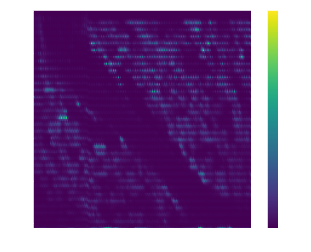

In [62]:
plt.imshow(np.nanmean(Y,axis=0))
# plt.clim(0,1)
plt.colorbar()

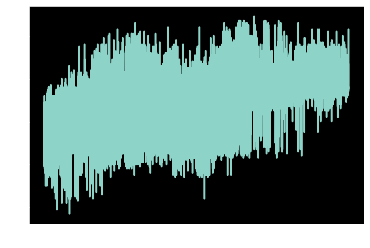

In [11]:
# print(x.shape, (x + np.arange(0,256,2)[None,None,:]).shape)
# plt.plot(x[0,0,:] + np.arange(0,256,2))
# plt.plot(x[0,0,:])

# plt.plot(reg['x_rigid'])
plt.plot(x[:,0,0] - reg['x_rigid']/ 256 * props['frame_shape'][1])


In [12]:
import suite2p
import re
dat = suite2p.io.tiff.ScanImageTiffReader(raw_file).data().reshape(-1,props['n_channels'],*props['frame_shape']).astype(np.int16)
anat = dat[:,1,:,:].copy()

stack,_ = suite2p.io.tiff.open_tiff(stack_file,sktiff=0)
    
n_frames_per_plane = int(re.search("SI.hStackManager.framesPerSlice = (\d+)", stack.metadata()).groups()[0]) // int(re.search("SI.hScan2D.logAverageFactor = (\d+)", stack.metadata()).groups()[0])
stack_size =(int(re.search("SI.hRoiManager.linesPerFrame = (\d+)", stack.metadata()).groups()[0]), int(re.search("SI.hRoiManager.pixelsPerLine = (\d+)", stack.metadata()).groups()[0]))
stack_n_chans = len(re.search("SI.hChannels.channelSave = \[((?:\d+;?)+)\]", stack.metadata()).groups()[0].split(';'))

stack_data = stack.data().reshape((-1,n_frames_per_plane,stack_n_chans,*stack_size))[:,:,0].mean(axis=1)

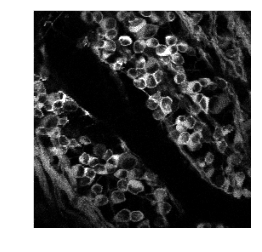

In [116]:
plt.imshow(stack_data[30], cmap='gray')
plt.clim(-27, 17253)

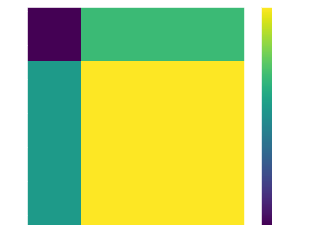

In [13]:
plt.imshow(y[100], interpolation='none', aspect=4)
plt.colorbar()

In [34]:
mshx, mshy = np.meshgrid(np.arange(128, dtype=np.float32), np.arange(32, dtype=np.float32))
# mshx, mshy = np.meshgrid(np.arange(0,256,2, dtype=np.float32), np.arange(0,256,8, dtype=np.float32))
Y = np.zeros_like(anat[10000:11000], dtype=np.float32)
suite2p.registration.register.nonrigid.shift_coordinates(anat[10000:11000], y, x, mshy, mshx, Y)

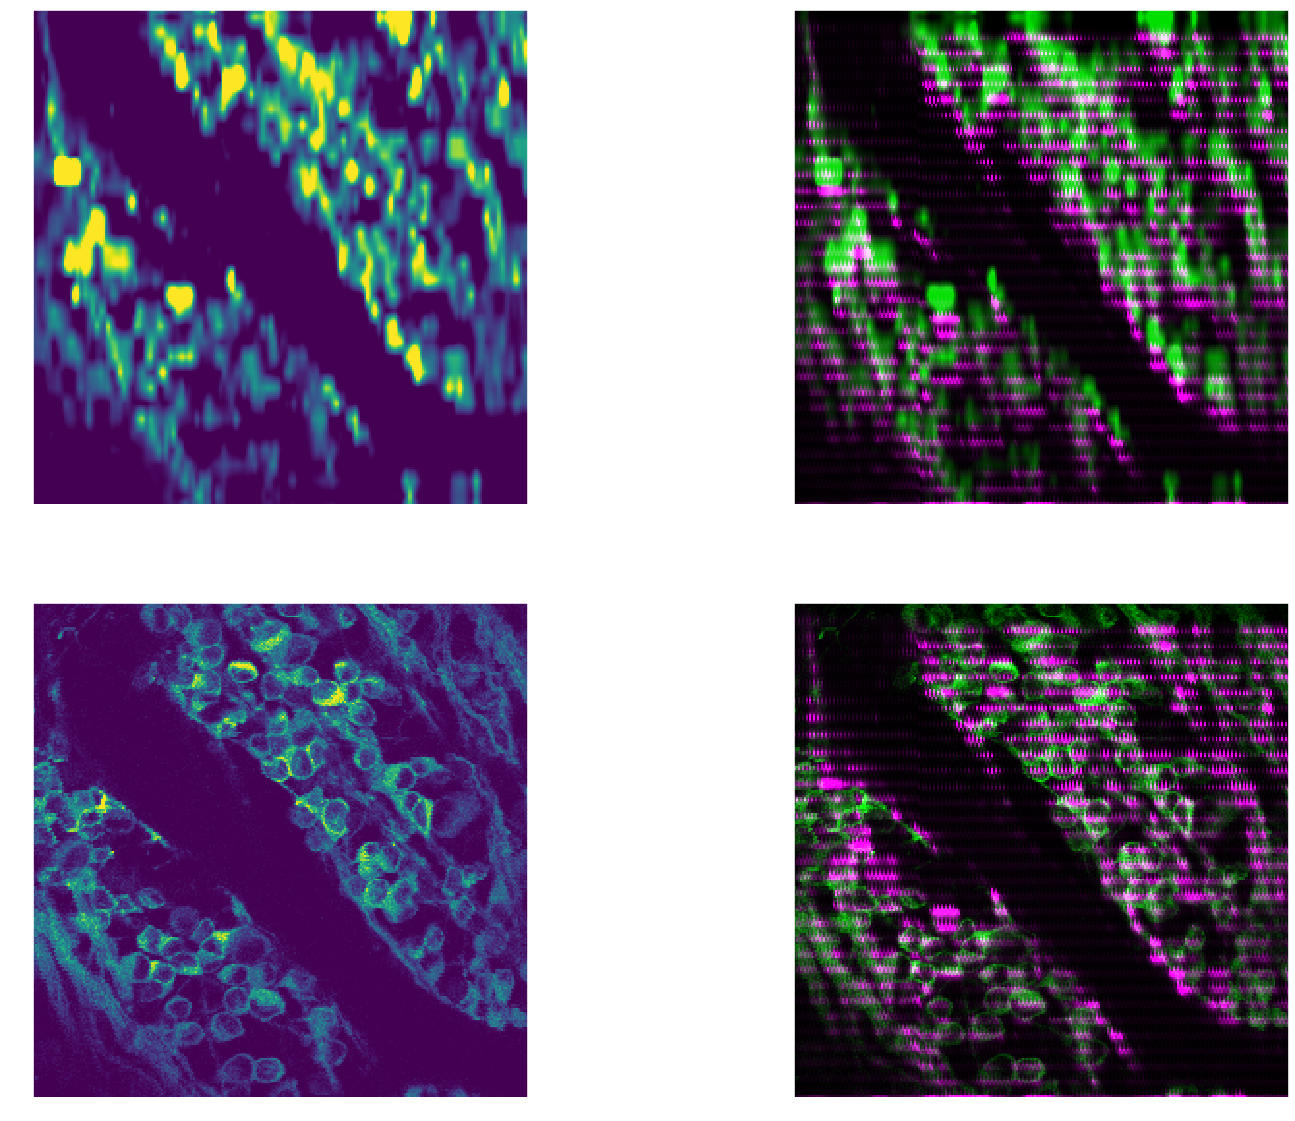

In [63]:
from skimage.transform import resize

Yr = (np.clip(resize(np.nanmean(Y, axis=0), (256,256)), 0, 40) - 0) / 40
Ar = (np.clip(resize(anat[10000:11000].mean(axis=0), (256,256)), 50, 400) - 50) / 400

_,axs = plt.subplots(2,2,figsize=(25,20))

i = axs.flat[0].imshow(Ar, interpolation='none')

# i = axs.flat[1].imshow(resize(Y.mean(axis=0), (256,256)), interpolation='none')
# # plt.colorbar()
# i.set_clim(50,400)
# # plt.show()
C = np.stack((
    Yr,
    Ar,
    Yr,
), axis=2)
axs.flat[1].imshow(C, interpolation='none')


i = axs.flat[2].imshow(stack_data[29], interpolation='none')
i.set_clim(50,20000)


C = np.stack((
    Yr,
    (np.clip(stack_data[29], 50, 20000) - 50) / 20000,
    Yr,
), axis=2)
axs.flat[3].imshow(C, interpolation='none')


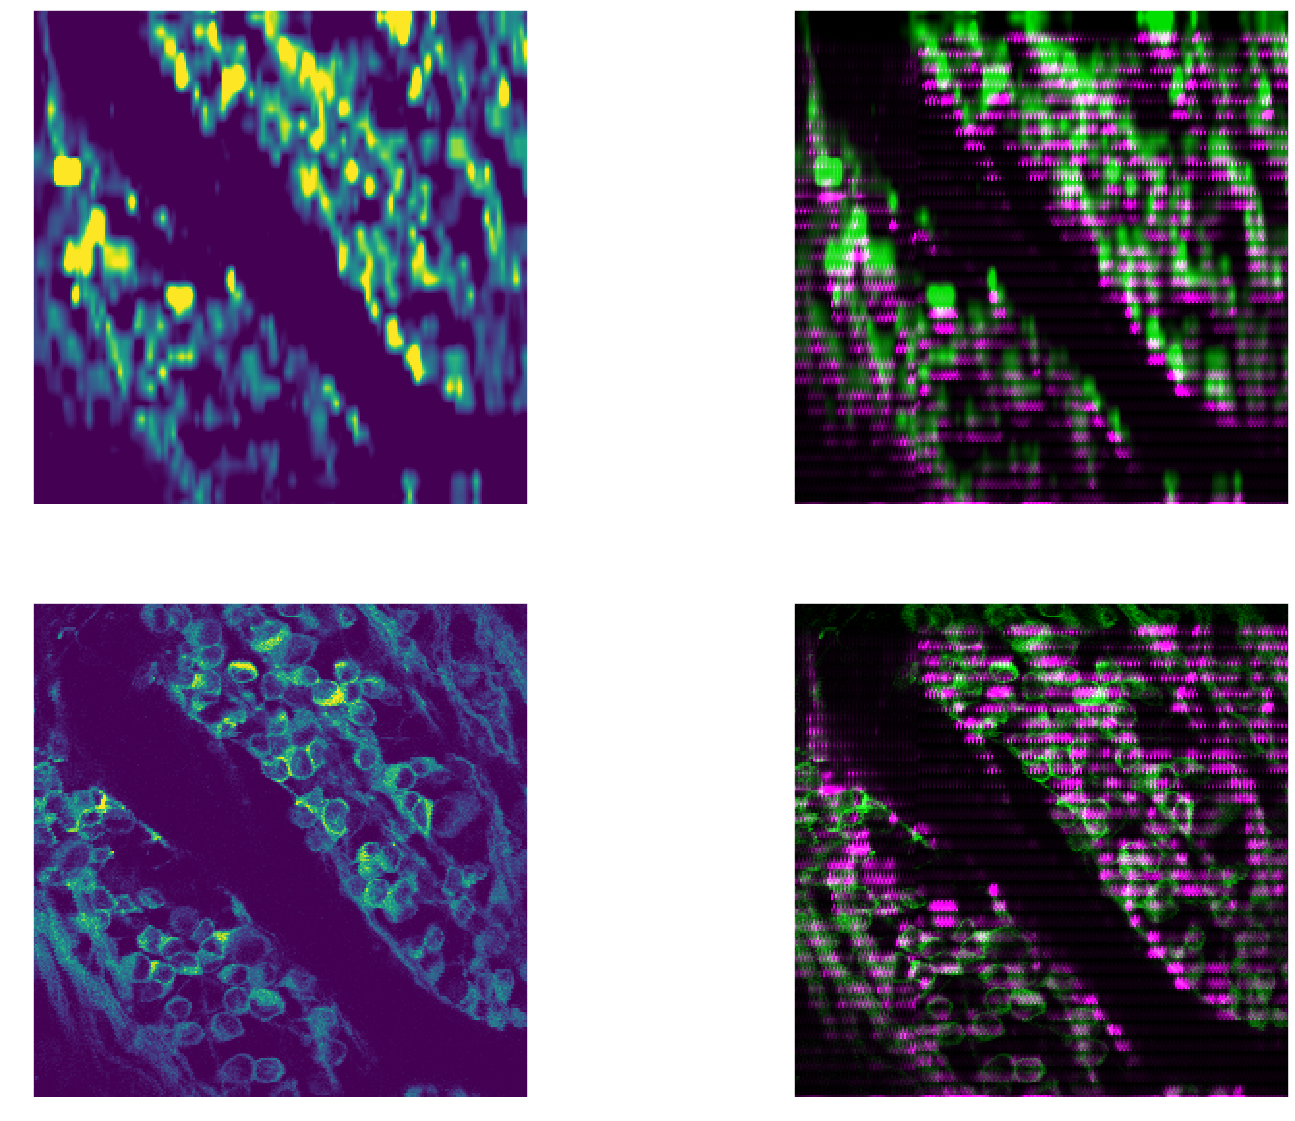

In [67]:
from skimage.transform import resize

Yr = (np.clip(resize(np.nanmean(Y, axis=0), (256,256)), 0, 40) - 0) / 40
Ar = (np.clip(resize(anat[10000:11000].mean(axis=0), (256,256)), 50, 400) - 50) / 400

_,axs = plt.subplots(2,2,figsize=(25,20))

i = axs.flat[0].imshow(Ar, interpolation='none')

# i = axs.flat[1].imshow(resize(Y.mean(axis=0), (256,256)), interpolation='none')
# # plt.colorbar()
# i.set_clim(50,400)
# # plt.show()
C = np.stack((
    Yr,
    Ar,
    Yr,
), axis=2)
axs.flat[1].imshow(C, interpolation='none')


i = axs.flat[2].imshow(stack_data[29], interpolation='none')
i.set_clim(50,20000)


C = np.stack((
    Yr,
    (np.clip(stack_data[29], 50, 20000) - 50) / 20000,
    Yr,
), axis=2)
axs.flat[3].imshow(C, interpolation='none')

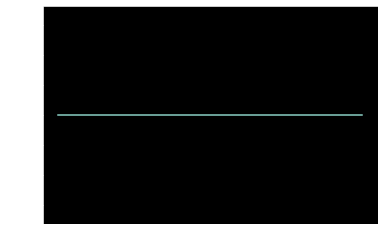

In [57]:
plt.plot(bars['intensity'])

In [ ]:
importlib.reload(preprocess)
import util.register
importlib.reload(util.register)
ops = preprocess.do_registration(raw_file, stack_file, bin_path, props)

In [ ]:
e_i = np.asarray(list(zip(spots['cx'], spots['cy'])), dtype="f,f")

In [ ]:
# ue, e_i, e_c = np.unique(np.stack((spots['cx'],spots['cy'])),axis=1, return_inverse=True, return_counts=True)
importlib.reload(preprocess)
# e_i = np.asarray(list(zip(spots['cx'], spots['cy'])), dtype="f,f")
rois = preprocess.segment(bin_path, props, np.stack((spots['pre_on'],spots['spot_on'],spots['tail_off'])), e_i, mask_file, dark_file)
np.save(os.path.join(bin_path, 'spots.npy'), np.asarray(rois, dtype=object))

In [43]:
import suite2p
dat = suite2p.io.tiff.ScanImageTiffReader(raw_file).data().reshape(-1,props['n_channels'],*props['frame_shape']).astype(np.int16)
F,C,Y,X = dat.shape
tt = np.zeros((F,Y,X))
tt += np.arange(0, X)[None, None, :] / props['pixel_rate']
tt += np.arange(0, Y)[None, :, None] / props['line_rate']
tt += ((props['time_stamps'] - props['time_stamps'][0]) / 1e7)[:, None, None]
tt = tt.flatten()

trig = dat[:,-1,:,:].copy()
trig[:,1::2,:] = np.flip(trig[:,1::2,:], axis=2) #bidi scanning

In [45]:
func = dat[:,0,:,:].copy() # ehm... incorrect?
func[:,1::2,:] = np.flip(func[:,1::2,:], axis=2) #bidi scanning


anat = dat[:,1,:,:].copy()
anat[:,1::2,:] = np.flip(anat[:,1::2,:], axis=2) #bidi scanning

In [264]:
# for c in [0.05, 0.5,0.33]:
#     bit_pattern = np.zeros(256, dtype=bool)
#     byte = f'{round(c*255):08b}' #convert to a binary word
#     for i,bit in enumerate(byte): 
#         if bit == '1':
#             bit_pattern[2**(7-i)-1 : 2**((7-i)+1) - 1] = 1

#     plt.plot(bit_pattern)

# plt.show()

# for c in [0.33]:
#     bit_pattern = np.zeros(256, dtype=bool)
#     byte = f'{np.ceil(c*127).astype(np.uint8):07b}'
#     for i,bit in enumerate(byte): 
#         if bit == '1':
#             bit_pattern[2**(6-i)-1 : 2**((6-i)+1) - 1] = 1

#     byte = f'{np.floor(c*127).astype(np.uint8):07b}'
#     for i,bit in enumerate(byte): 
#         if bit == '1':
#             bit_pattern[2**(6-i)-1+128 : 2**((6-i)+1) - 1 + 128] = 1
    
#     plt.plot(bit_pattern)

# plt.show()

# int(0b010100)/127, int(0b010110)/127

bit_pattern = np.zeros(256, dtype=bool)
byte = f'{0b0101100:07b}'
for i,bit in enumerate(byte): 
    if bit == '1':
        bit_pattern[2**(6-i)-1 : 2**((6-i)+1) - 1] = 1

byte = f'{0b0100100:07b}'
for i,bit in enumerate(byte): 
    if bit == '1':
        bit_pattern[2**(i)-1+128 : 2**((i)+1) - 1 + 128] = 1

print(byte)

0100100


In [ ]:
importlib.reload(preprocess)

blocks = preprocess.extract_parameters(symphony_file)
epochs = preprocess.flatten_epochs(blocks)

props = preprocess.process_raw_file(raw_file, bin_path)
epochs, props = preprocess.align_frames_to_epochs(epochs, props)


Dropped 105 frames in 61 trials (0.081%)


ValueError: Columns must be same length as key

In [203]:
print(bars['pre_on'][0],bars['stim_on'][0], bars['stim_off'][0])
print(func.shape, anat.shape, trig.shape)

# from scipy.signal import resample
from scipy.interpolate import interp1d

# ts = (props['time_stamps'] - props['time_stamps'][0]) / 1e7
af = anat.flatten()

xss = []
for bi in np.arange(60):
    
    xs = np.empty((180,256)) * np.nan
    i = 0

    # get the baseline level for each pixel
    bl = anat[bars['pre_on'][bi] // (32*128) + 1: bars['stim_on'][bi] // (32*128) + 1].mean(axis=0).flatten()
    # print(bl.shape)
    # plt.imshow(bl, aspect=4)

    #split the frames into 256 segments
    #correct way to do this takes into account time between frames/lines...
    flip_i = np.argwhere(props['flips'] >= bars['stim_on'][bi])[0][0]
    last_frame = props['flips'][flip_i] // (32*128)
    last_frame_pi = props['flips'][flip_i] % (32*128)
    # print(flip_i, last_frame, last_frame_pi)

    while props['flips'][flip_i] < bars['stim_off'][bi]:
        next_frame = props['flips'][flip_i+1] // (32*128)
        next_frame_pi = props['flips'][flip_i+1] % (32*128)
        
        if next_frame == last_frame:
            xs[i,:] = interp1d(
                tt[props['flips'][flip_i] : props['flips'][flip_i+1]],
                af[props['flips'][flip_i] : props['flips'][flip_i+1]] - bl[last_frame_pi:next_frame_pi]
                )(np.linspace(
                    tt[props['flips'][flip_i]], 
                    tt[props['flips'][flip_i+1]-1], 
                    256
                    ))
        else:
            xs[i,:] = interp1d(
                tt[props['flips'][flip_i] : props['flips'][flip_i+1]],
                af[props['flips'][flip_i] : props['flips'][flip_i+1]] - np.concatenate((
                    bl[last_frame_pi:],
                    bl[:next_frame_pi]
                )))(np.linspace(
                    tt[props['flips'][flip_i]], 
                    tt[props['flips'][flip_i+1]-1],
                    256
                ))
            
        last_frame = next_frame
        last_frame_pi = next_frame_pi
        flip_i += 1
        i += 1

    # bars.keys()
    xss.append(np.asarray(xs))


49864472 49895765 50298691
(83541, 32, 128) (83541, 32, 128) (83541, 32, 128)


 C:\Users\zfj\AppData\Local\Temp\ipykernel_14972\1386451926.py:13: RuntimeWarning:invalid value encountered in multiply


0.3314629447564845 0.2421875 0.34375


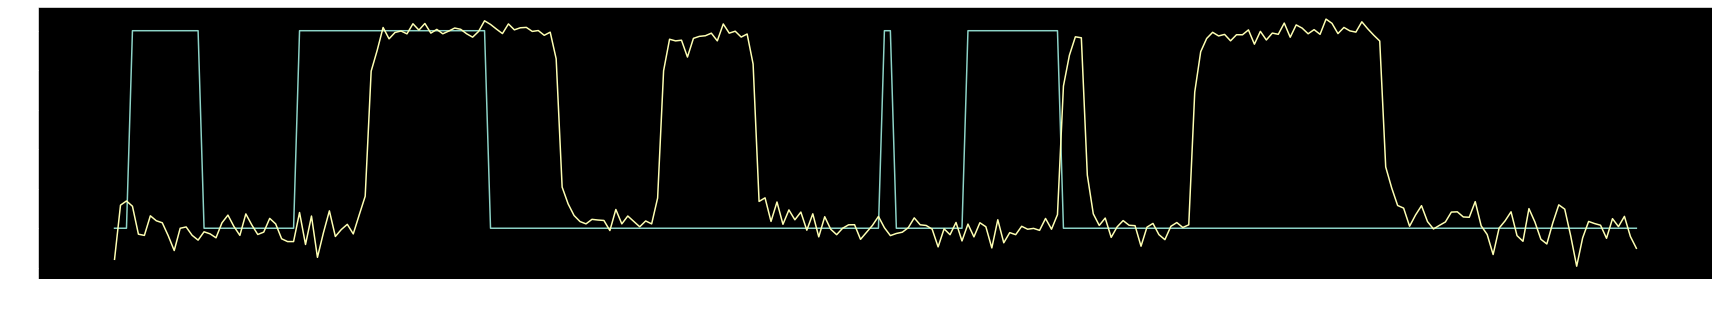

In [370]:
plt.figure(figsize=(30,5))
bp = np.nanmedian(np.concatenate(xss, axis=0),axis=0)
# bp_d = np.nanstd(np.concatenate(xss, axis=0),axis=0) / np.sqrt(np.count_nonzero(np.concatenate(xss, axis=0) , axis=0))

# bp_d -= np.percentile(bp, 8)
bp -= np.percentile(bp,25)

# bp_d /= bp.max()
bp /= np.percentile(bp,90)

xn = np.linspace(0,1/60,257)[:-1] 
plt.plot(xn,bit_pattern)

plt.plot(xn,bp)

# plt.plot(xn[::2],bp[:128])
# plt.plot(xn[::2],bp[255:127:-1])
# plt.plot(np.arange(0,256,2),bp[127::-1])
# plt.plot(np.arange(0,256,2),bp[128:])

# plt.errorbar(np.arange(256), bp, bp_d)

print(bp.mean(), bit_pattern.mean(), (bp>0.2).mean())
# plt.vlines([1/60/2, 1/60/4],-0.25,1.25)
plt.xticks(np.linspace(0.0,1/60,50),rotation=45)
plt.show()

In [252]:
print(int(0b010100)/127, int(0b010110)/127, int(0b010100)/127 + int(0b010110)/127)

print(int(0b010100)/127, int(0b010101)/127, int(0b010100)/127 + int(0b010101)/127)


0.15748031496062992 0.1732283464566929 0.3307086614173228
0.15748031496062992 0.16535433070866143 0.3228346456692913


In [ ]:

rois = np.load(os.path.join(bin_path, 'spots.npy'), allow_pickle=True)

In [ ]:
rois[0]['trial']

In [ ]:
# xn = np.linspace(-.2,1,200)[:,None]
# import GPy
# # print(rois[0]['trial_t'][:,None].shape, rois[0]['dFoF'][:,None].shape)
# m1 = GPy.models.SparseGPRegression(
#     rois[0]['trial_t'][:,None], 
#     rois[0]['dFoF'][:,None],
#     num_inducing=300,
#     kernel = GPy.kern.RBF(1),
# )

# m1.rbf.lengthscale.constrain_bounded(1e-4,1e-1)

# m1.optimize_restarts(4, messages=False, max_iters = 20)

# mu1,std1 = m1.predict(xn, include_likelihood = False)
# _,std2 = m1.predict(xn, include_likelihood = True)

# # plt.scatter(rois[0]['trial_t'], rois[0]['dFoF'], edgecolor='none', alpha=.5)
# plt.fill_between(
#     xn.flatten(),
#     (mu1 - std1).flatten(),
#     (mu1 + std1).flatten(),
#     alpha = 0.33,
#     color='w'
# )
# plt.fill_between(
#     xn.flatten(),
#     (mu1 - std2).flatten(),
#     (mu1 + std2).flatten(),
#     alpha = 0.33,
#     color='w'
# )
# plt.plot(xn, mu1, 'w')

########

from scipy.interpolate import CubicSpline, RBFInterpolator
# spline = lambda x,y: CubicSpline(x,y,extrapolate=False)
spline = lambda x,y: RBFInterpolator(x[:,None],y,smoothing=0.05)

# cs = spline(rois[0]['trial_t'], rois[0]['dFoF'],)
xn = np.linspace(-.25,1.0,200)[:,None]

spots_smooth = np.empty((len(rois), len(e_i), len(xn))) * np.nan
for roi in range(len(rois)):
    for trial in range(len(e_i)):
        t = rois[roi][rois[roi]['trial']==trial].sort_values('trial_t')
        cs = spline(t['trial_t'], t['dFoF'])

        valid = np.logical_and(xn>=t['trial_t'].min(), xn<=t['trial_t'].max())
        # print(valid.shape, xn[valid,None].shape)
        spots_smooth[roi,trial,valid.squeeze()] = cs(xn[valid,None]).squeeze()
        # di_int[j,~valid.squeeze()] = np.nan
# rois[0]


In [ ]:
# plt.plot(xn, spots_smooth[0,:,:].T)
plt.plot(xn, spots_smooth.mean(axis=1).T, linewidth=2)
plt.ylim(-1,1)
plt.show()

In [ ]:
# cim = (data[:,:2,:,:] - data[:,:2,:,:].mean(axis=0)) / data[:,:2,:,:].std(axis=0)
_,axs = plt.subplots(4,8,figsize=(20,10))
axs = axs.flatten()
for i,ax in enumerate(axs):
    if i % 2:
        ax.imshow(data[32800+(4540//32)-10 + i//2,-1], aspect=4).set_clim(0,24000)
    else:
        ax.imshow(cim[32800+(4540//32)-10 + i//2,1], aspect=4).set_clim(0,4)

In [ ]:
#frames 32800 : 35500, 2 back-to-back moving bar trials (total 20 bars)
# cdat = np.moveaxis(data[32800:35500,:2,:,:].mean(axis=-1),2,1).reshape((-1,2))
# cdat = (cdat - cdat.mean(axis=0)) / cdat.std(axis=0)
# cdat = np.moveaxis(data[:,:2,:,:].mean(axis=-1),2,1).reshape((-1,2))

# cdat = (data[:,:2,:,:] - data[:,:2,:,:].mean(axis=0)) / data[:,:2,:,:].std(axis=0)
# cdat = np.moveaxis(cdat[32800:35500].mean(axis=-1), 2,1).reshape((-1,2))

fig = plt.figure(figsize=(20,5))

# plt.plot(cdat[:,1], color='r')
# plt.plot(cdat[:,0], color='g', alpha=.8)

# additive blending
xl = (0,len(cdat))
# xl = (4500,4600)
yl = (-0.5,3.5)

plt.plot(cdat[:,1], color='r', alpha = .6)
plt.gca().set_xlim(xl)
plt.gca().set_ylim(yl)
fig.canvas.draw()
w, h = fig.canvas.get_width_height()
img = np.frombuffer(fig.canvas.buffer_rgba(), np.uint8).reshape(h, w, -1).copy()

plt.gca().clear()
plt.plot(cdat[:,0], color='g')
plt.gca().set_xlim(xl)
plt.gca().set_ylim(yl)
fig.canvas.draw()
img2 = np.frombuffer(fig.canvas.buffer_rgba(), np.uint8).reshape(h, w, -1).copy()

print(img.shape, img2.shape)
img[img[:, :, -1] == 0] = 0
img2[img2[:, :, -1] == 0] = 0

fig.clf()

plt.imshow(np.maximum(img, img2))
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.show()



In [ ]:
from scipy.signal import find_peaks

data.shape
trig = data[:,-1].copy()
trig[:,1::2,:] = np.flip(trig[:,1::2,:], axis=2)
trig = trig.flatten() #bidi scanning
# print(trig.shape)

# _,axs = plt.subplots(1,2, figsize=(20,5))
# axs[0].plot(data[32800+(4540//32)-10 ,-1].flatten())
# axs[1].plot(trig[32800+(4540//32)-10].flatten())



# plt.figure(figsize=(20,5))

# r = trig[32800+(4540//32)-54: 32800+(4540//32)].flatten()
# plt.plot(r)

w = 4
a = trig[w:] - trig[:-w]

# plt.plot(a)
p,_ = find_peaks(np.abs(a), distance=600, prominence=300, wlen=600)
p = p - w//2


# plt.vlines(p-w/2, -25000, 25000,'w')
# plt.show()

l = np.empty((len(p)-1,1))
for i in range(1,len(p)):
    l[i-1] = trig[(p[i-1]):p[i]].mean()
# plt.figure()
# plt.hist(l, 200)
# plt.show()

In [ ]:
# plt.hist(np.diff(p), 1000)
# from scipy.stats import mode
# print(mode(np.diff(p)))
# plt.plot(np.unique(np.diff(p)))
# plt.xlim(0,189)
# plt.ylim(0,10000)

# len(p)/60/60 #minutes, roughly
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, algorithm='elkan').fit(l)
fl = km.predict(l)

idx = np.argsort(km.cluster_centers_.flatten())
lut = np.zeros_like(idx)
lut[idx] = np.arange(len(idx))
fl = lut[fl]
    

In [ ]:
# fl.shape
# plt.plot(trig.reshape(-1,32,128)[32800].flatten())
cm = plt.get_cmap('tab20')
# cm([0,4])
trig.shape
plt.plot(trig.reshape(-1,32,128)[32885:32900,:,:].flatten())

print(fl.shape)

plt.vlines(p[np.logical_and(p>32885*32*128, p < 32900*32*128)] - 32885*32*128, -5000, 28000, colors=cm(fl[np.logical_and(p>32885*32*128, p < 32900*32*128)[:-1]]))
# # plt.plot(trig[32800*32*128+(4540)-10*32*128 : 32800*32*128+(4540)+10*32*128])

In [ ]:
# epochs = preprocess.flatten_epochs(preprocess.extract_parameters(symphony_file))
# epochs, props = preprocess.align_frames_to_epochs(epochs, props)

In [ ]:
props

In [ ]:
rois_chirp = preprocess.segment(bin_path, props, np.stack((chirps['pre_on'],chirps['chirp_on'],chirps['tail_off'])), np.ones(len(chirps['pre_on'])), mask_file, dark_file)

In [ ]:
np.save(os.path.join(bin_path, 'chirps.npy'), np.asarray(rois_chirp, dtype=object))

In [ ]:
rois = np.load(os.path.join(bin_path, 'spots.npy'), allow_pickle=True)
e_i = np.load(os.path.join(bin_path, 'spots_labels.npy'), allow_pickle=True)


In [ ]:
print(ue)

In [ ]:
import suite2p
mask = suite2p.io.tiff.open_tiff(mask_file, True)[0].pages[0].asarray()

from skimage.transform import resize

_,axs = plt.subplots(2,3,figsize=(17,10))
axs = axs.flatten()
axs[0].imshow(mask, aspect=1, interpolation='nearest')
axs[1].imshow(mask[::8,::2], aspect=4, interpolation='nearest')
axs[2].imshow(mask[1::8,::2], aspect=4, interpolation='nearest')
axs[3].imshow(mask[2::8,::2], aspect=4, interpolation='nearest')
axs[4].imshow(mask[3::8,::2], aspect=4, interpolation='nearest')
axs[5].imshow(np.asarray([resize(mask==i, (32,128))*i for i in range(1,mask.max().astype(int))]).sum(axis=0), aspect=4, interpolation='nearest')



#need to ds the mask >.<

In [ ]:
roi = rois[ri].groupby(['frame', 'trial','stimulus']).mean().reset_index()
roi_i = roi[roi['stimulus']==0]

# plt.scatter(roi_i['trial_t'], roi_i['y'])
plt.hist(roi['stimulus'])

In [ ]:
roi_ind = [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171]

# np.argwhere(np.asarray(roi_ind)==114)

In [ ]:
# len(np.unique(rois[113].stimulus))
rois[113][rois[113]['trial']==0]

In [ ]:
from scipy.interpolate import UnivariateSpline,CubicSpline, RBFInterpolator
# spline = lambda x,y: np.poly1d(np.polyfit(x,y,8))
# spline = lambda x,y: CubicSpline(x,y,extrapolate=False)
# spline = lambda x,y: UnivariateSpline(x,y, k=5, s = 15, ext='const')
spline = lambda x,y: RBFInterpolator(x[:,None],y,smoothing=0.05)
xn = np.linspace(-.25,1,200)[:,None]

_,axs = plt.subplots(3,2, figsize=(30,30))
axs = axs.flatten()



ri = 57#[108, 114, 27, 156]
param = 'dFoF'

roi = rois[ri].groupby(['frame', 'trial','stimulus']).mean().reset_index()
for i in range(4):
    roi_i = roi[roi['stimulus']==i]
    # s = plt.scatter(dff_i['trial_t'], dff_i['y'], s = .5, alpha=.2)
    # plt.draw()
    # print(roi_i['dFoF'].min(),roi_i['dFoF'].max())

    u,u_i = np.unique(roi_i['trial'], return_inverse=True)
    di_int = np.empty((len(u), len(xn)))
    # print(u_i)
    # for j,j_i in zip(u.astype(int),u_i):
    for j in range(len(u)):
        t = roi_i[u_i==j].sort_values('trial_t')
        # print(j,j_i)
        # print(dff_i[u_i==j])
        cs = spline(t['trial_t'], t[param])
        valid = np.logical_and(xn>=t['trial_t'].min(), xn<=t['trial_t'].max())
        # print(valid.shape, xn[valid,None].shape)
        di_int[j,valid.squeeze()] = cs(xn[valid,None]).squeeze()
        di_int[j,~valid.squeeze()] = np.nan
        
    # plt.plot(xn,np.nanmean(di_int,axis=0), c=s.get_facecolors()[0], alpha=1)
    
    axs[0].scatter(roi_i['trial_t'], roi_i[param], s=3, alpha=.3)
    line = axs[0].plot(xn,np.nanmean(di_int,axis=0), alpha=1)[0]

    axs[i+1].plot(xn, di_int.T)
    # c = line.get_color()
    # plt.fill_between(
    #     xn.flatten(),
    #     (np.nanmean(di_int,axis=0) + 3*np.nanstd(di_int,axis=0)/np.sqrt(len(u))).flatten(),
    #     (np.nanmean(di_int,axis=0) - 3*np.nanstd(di_int,axis=0)/np.sqrt(len(u))).flatten(),
    #     facecolor = c,
    #     alpha = 0.33
    # )
# plt.ylim([800,1500])
# axs[0].set_ylim([-.05, 0.1])
# axs[0].set_ylim([800, 1200])
axs[0].set_xlim([-.25, 1])
# axs[ci].set_xlabel('Time (s)')
# axs[ci].set_ylabel('Fluorescence (a.u.)')
# axs[ci].set_xlim(-.25, 1.25)
# axs[ci].set_ylim(-.5,1.0)
# axs[ci].set_title(f'ROI {ci}')

# plt.figure()
# plt.plot(xn[:,None], di_int.T)

In [ ]:
# print(np.unique(rois[0]['trial']))
spline = lambda x,y: RBFInterpolator(x[:,None],y,smoothing=0.05)
xn = np.linspace(-.25,1.0,200)[:,None]

data_smooth = np.empty((len(rois), len(e_i), 200)) * np.nan

for roi in range(len(rois)):
    for trial in range(len(e_i)):
        t = rois[roi][rois[roi]['trial']==trial].sort_values('trial_t')
        cs = spline(t['trial_t'], t['dFoF'])

        valid = np.logical_and(xn>=t['trial_t'].min(), xn<=t['trial_t'].max())
        # print(valid.shape, xn[valid,None].shape)
        data_smooth[roi,trial,valid.squeeze()] = cs(xn[valid,None]).squeeze()
        # di_int[j,~valid.squeeze()] = np.nan

        

# print(len(rois))
# ci = 5
# plt.scatter(rois[ci]['trial_t'], rois[ci]['dFoF'], s=2, alpha=.01)
# plt.figure()

# plt.scatter(rois[ci]['trial_t'], rois[ci]['y'], s=2, alpha=.01)


In [ ]:
# np.save(os.path.join(bin_path,'spots_labels.npy'), e_i)
np.save(os.path.join(bin_path,'spots_smooth.npy'), data_smooth)


In [ ]:
spline = lambda x,y: RBFInterpolator(x[:,None],y,smoothing=0.05)
xn = np.linspace(-.25,1,200)[:,None]

t0= np.argwhere(xn>0)[0,0]
#, np.argwhere(xn<1)[-1]
print(t0)


In [ ]:
e_i = np.load(os.path.join(bin_path,'spots_labels.npy'))
data_smooth = np.load(os.path.join(bin_path,'spots_smooth.npy'))


In [ ]:
cm_data = [[0,0,0], [0.2116238095*.25, 0.1897809524*.25, 0.5776761905*.25], 
 [0.212252381*.5, 0.2137714286*.5, 0.6269714286*.5], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [ ]:
# print(ue)
# _,axs = plt.subplots(2,4,figsize=(30,15))
# for i in range(4):
#     E_ON = np.nanmedian(data_smooth[:,e_i==i,34:100]**2, axis=(1,2))
#     E_OFF = np.nanmedian(data_smooth[:,e_i==i,100:166]**2, axis=(1,2))

#     mm = np.zeros_like(mask, dtype=float)
#     for j in range(len(rois)):
#         mm[mask == rois[j].roi] = E_ON[j]

#     im = axs[0,i].imshow(mm, interpolation='nearest')
#     # plt.colorbar(im, ax=axs[0,i])
#     # im.set_clim(np.percentile(E_ON,1),np.percentile(E_ON,99))
#     im.set_clim(.0002,.0023)

#     mm = np.zeros_like(mask, dtype=float)
#     for j in range(len(rois)):
#         mm[mask == rois[j].roi] = E_OFF[j]

#     im = axs[1,i].imshow(mm, interpolation='nearest')
#     # plt.colorbar(im, ax=axs[1,i])
#     # im.set_clim(np.percentile(E_OFF,1),np.percentile(E_OFF,99))
#     im.set_clim(.0002,.0023)
print(data_smooth.shape, e_i.shape)
fig,axs = plt.subplots(4,4,figsize=(30,35))
axs = axs.flatten()

for i in range(16):
    E_ON = np.abs(np.nanmean(data_smooth[:,e_i==i,t0:], axis=(1,2)))
    # print(E_ON)

    mm = np.zeros_like(mask, dtype=float)
    for j in range(len(roi_ind)):
        mm[mask == roi_ind[j]] = E_ON[j]

    im = axs[i].imshow(mm, interpolation='nearest', alpha=( mask > 0).astype(float), cmap=parula_map)

    # plt.colorbar(im, ax=axs[i])
    # im.set_clim(np.percentile(E_ON,1),np.percentile(E_ON,99))
    im.set_clim(.005,.1)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    

fig.subplots_adjust(right=0.83)
cax = fig.add_axes([0.85,0.15,0.025,0.7])
fig.colorbar(im, cax=cax)

In [ ]:

        _, axs = plt.subplots(29,6,figsize=(30,160))
        axs = axs.flatten()
        for ci in range(len(data_smooth)):
            for i in range(16):
                p = data_smooth[ci,e_i==i,:]

                line, = axs[ci].plot(xn,p.mean(axis=0), linewidth=0.5)
                c = line.get_color()
                axs[ci].fill_between(
                    xn.flatten(),
                    (p.mean(axis=0) + 3*p.std(axis=0)/np.sqrt(len(data_smooth))).flatten(),
                    (p.mean(axis=0) - 3*p.std(axis=0)/np.sqrt(len(data_smooth))).flatten(),
                    facecolor = c,
                    alpha = 0.33
                )
                axs[ci].set_title(f'ROI {ci}')

In [ ]:
mi = info.MI(labels, 1, nbins=12)    
return mi.QE(y_hat[:,None], shuffle=False)



In [ ]:
import pandas as pd
rois_chirp_1 = np.load(r'C:\Users\zfj\data\100522B\region1_00001\chirps.npy', allow_pickle=True)
print(len(rois_chirp_1),len(rois_chirp))
rois_chirp_2 = [pd.concat([roi1,roi2]) for roi1,roi2 in zip(rois_chirp_1,rois_chirp)]


In [ ]:
print(len(rois_chirp_2[0]), len(rois_chirp[0]), len(rois_chirp_1[0]))

In [ ]:
# dfs_chirp[1]
import GPy
import os

xn_chirp = np.linspace(-2,33,500)[:,None]

resp = np.empty((len(rois_chirp), len(xn_chirp)))
resp_std = np.empty_like(resp)
noise_std = np.empty_like(resp)

for ci in range(len(rois_chirp)):

    x = rois_chirp_2[ci]['trial_t'][:,None]
    y = rois_chirp_2[ci]['dFoF'][:,None]

    m1 = GPy.models.SparseGPRegression(
        x,
        y,
        num_inducing=300,
        kernel = GPy.kern.RBF(1),
    )

    m1.optimize_restarts(4, messages=False, max_iters = 20)

    mu1,std1 = m1.predict(xn_chirp, include_likelihood = False)
    resp[ci,:],resp_std[ci,:] = mu1.flatten(), std1.flatten()
    _,std2 = m1.predict(xn_chirp, include_likelihood = True)
    noise_std[ci,:] = std2.flatten()

np.save(os.path.join(bin_path,'..','chirp_mean.npy'), resp)
np.save(os.path.join(bin_path,'..','chirp_std.npy'), resp_std)
np.save(os.path.join(bin_path,'..','chirp_noise.npy'), noise_std)


In [ ]:
plt.plot(xn_chirp,resp.T)
plt.show()

In [ ]:
print(mu1.shape,sig1.shape, sigO1.shape)

In [ ]:
def chirp(sf):
   return np.concatenate((
        np.zeros(2*sf), #pre time
        np.ones(3*sf), #positive step
        np.zeros(3*sf), #negative time
        np.ones(2*sf) * 0.5, #inter time
        
        -np.sin(2*np.pi*np.linspace(0,8/sf,sf*8).cumsum() + np.pi)/2 + .5, # freq chirp
        np.ones(2*sf) * 0.5, #inter time
        -np.linspace(0,1,sf*8)*np.sin(2*np.pi*2*np.linspace(1/sf, 8, sf*8) + np.pi)/2 + .5, # amp chirp

        np.ones(2*sf) * 0.5, #inter time
        np.zeros(5*sf), #tail time
   )) 

In [ ]:
# ci=113
_,axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [8, 1]}, figsize=(30,15))
# _,axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [8, 1]}, figsize=(5,3))
axs[0].scatter(rois_chirp[ci]['trial_t'], rois_chirp[ci]['dFoF'], s=1)
axs[0].plot(xn_chirp, mu1, color='w')
axs[0].set_xlim(-2,33)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Fluorescence (a.u.)')
axs[0].fill_between(
    xn_chirp.flatten(),
    mu1.flatten() + 3*sig1.flatten(),
    mu1.flatten() - 3*sig1.flatten(),
    facecolor = 'w',
    alpha = .5
)
# axs[0].fill_between(
#     xn_chirp.flatten(),
#     mu1.flatten() + 3*sigO1.flatten(),
#     mu1.flatten() - 3*sigO1.flatten(),
#     facecolor = 'w',
#     alpha = .2
# )


axs[1].plot(np.linspace(-2,33,60*35), chirp(60), color='w')
axs[1].axis('off')
axs[1].set_xlim(-2,33)

plt.tight_layout()


In [ ]:
m1

In [ ]:
[rois_chirp[r].roi for r in [42,117,119,123]]
# rois_chirp[[42,117,119,123]].roi

# rois_chirp``
# rois_chirp[0].roi
print([r.roi for r in rois_chirp])